In [179]:
import numpy as np
import pandas as pd

csv_file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(csv_file_path)


In [180]:
# Display the first few rows of the dataset
print(diabetes_data.head())

# Display column names
print("Column Names:")
print(diabetes_data.columns)


   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

In [181]:
# Check for missing values
print("Missing Values:")
print(diabetes_data.isnull().sum())

Missing Values:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


<Axes: >

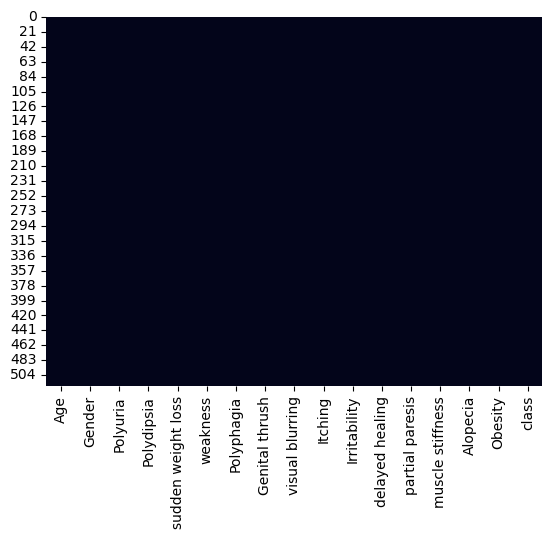

In [182]:
import seaborn as sns
sns.heatmap(diabetes_data.isnull(), cbar=False)


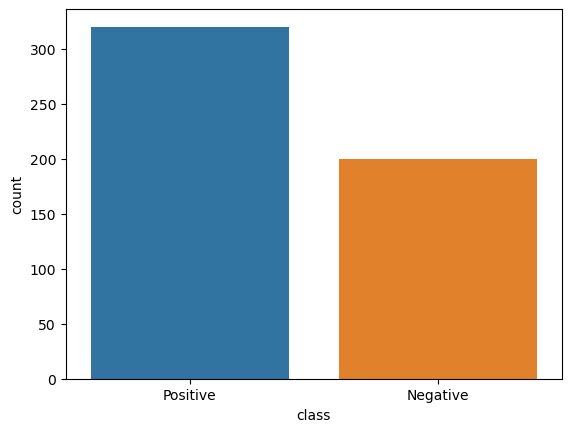

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=diabetes_data)
plt.show()


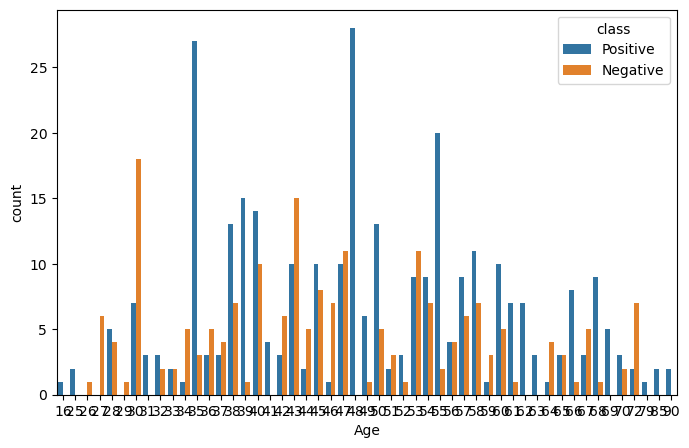

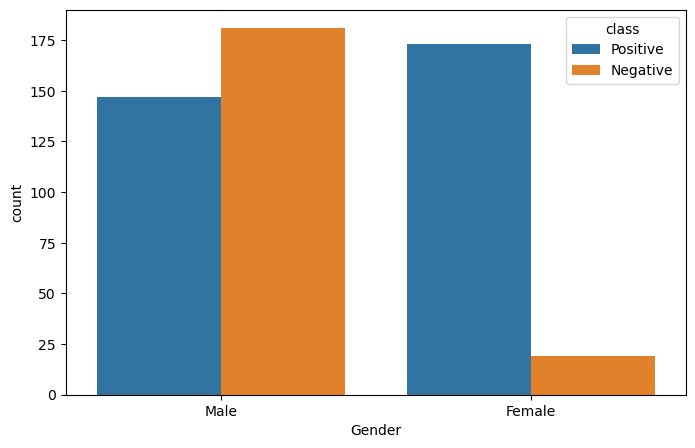

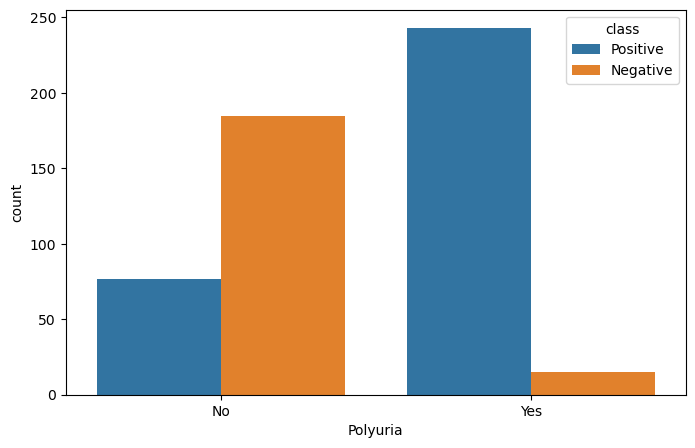

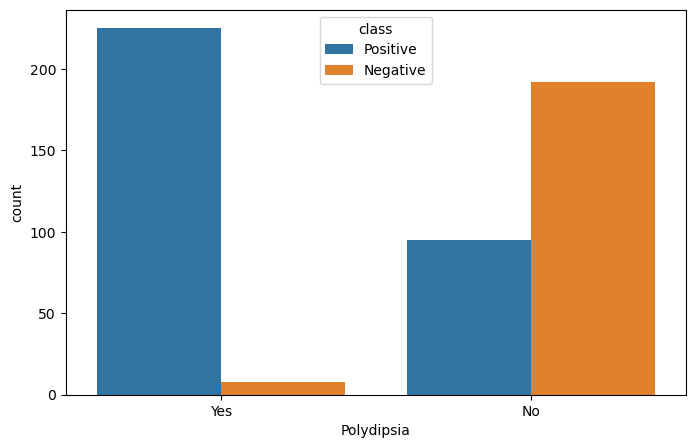

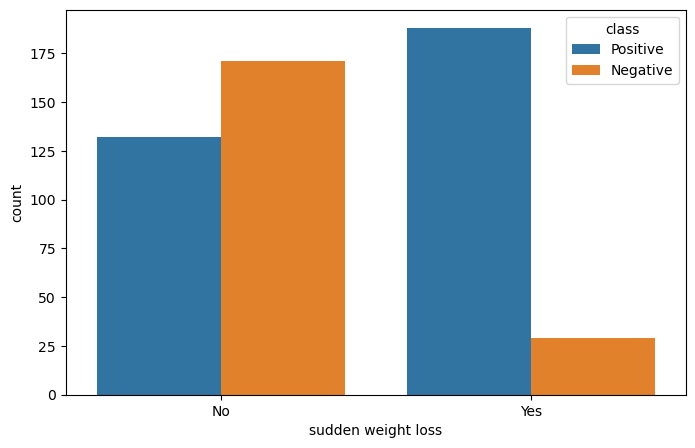

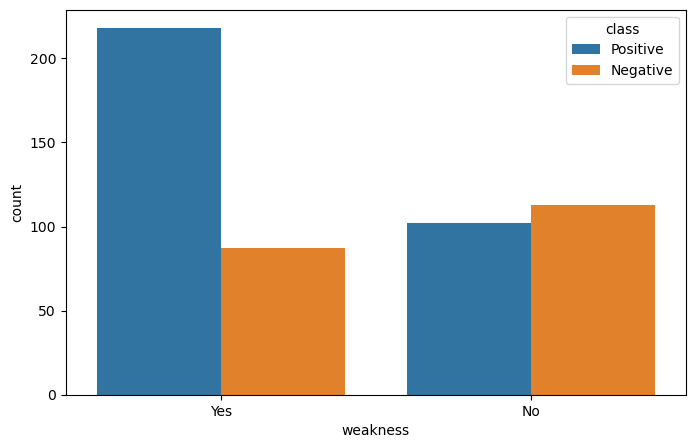

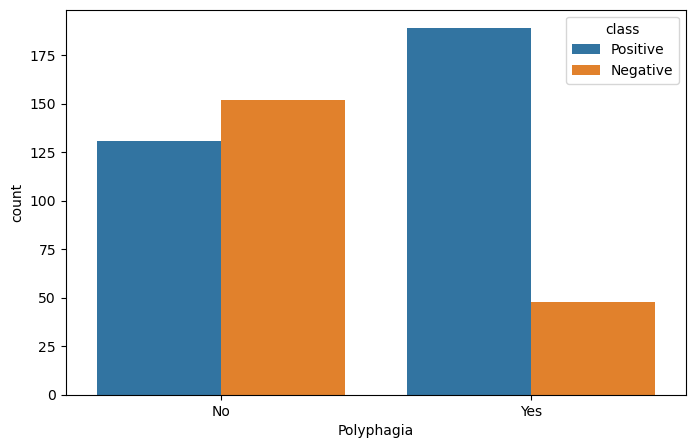

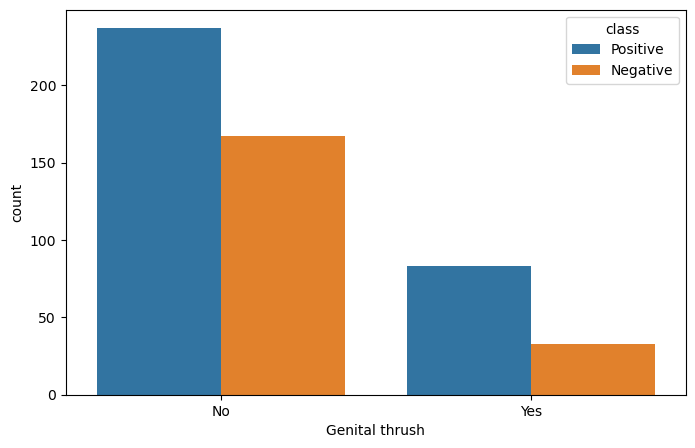

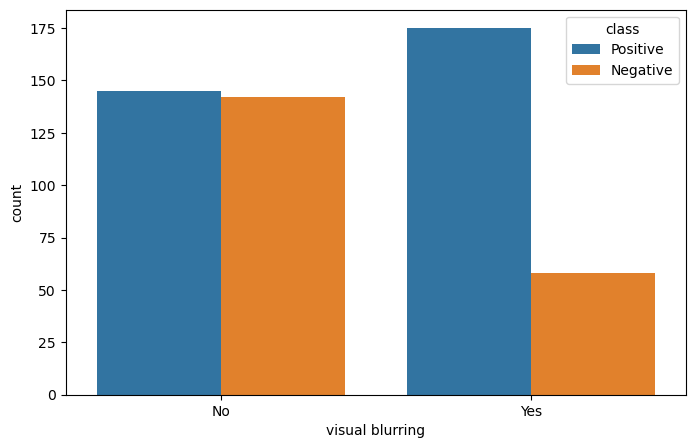

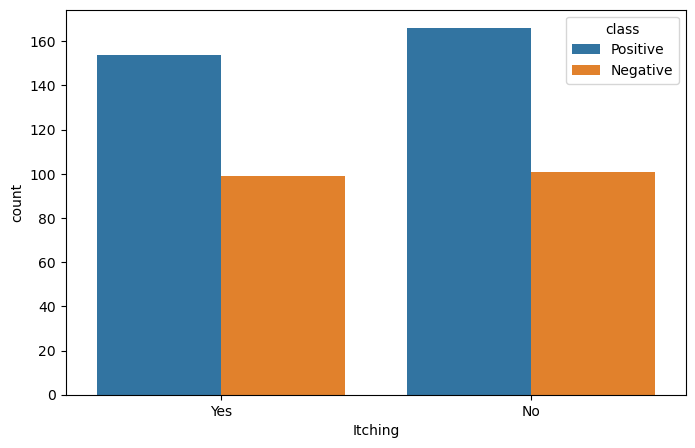

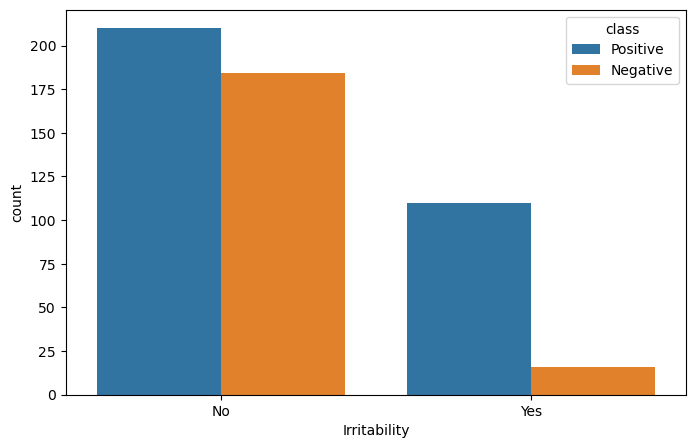

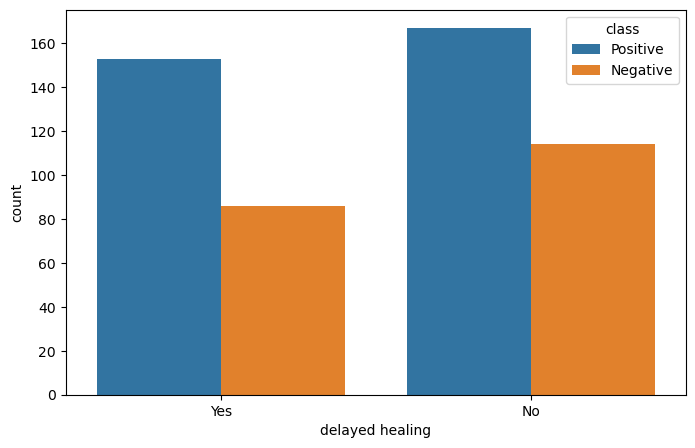

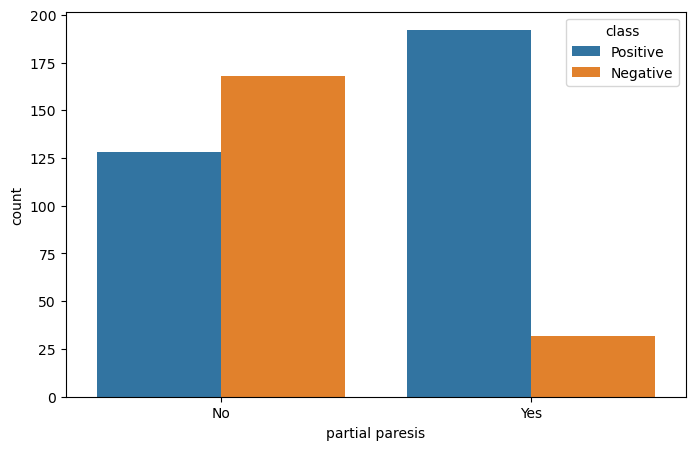

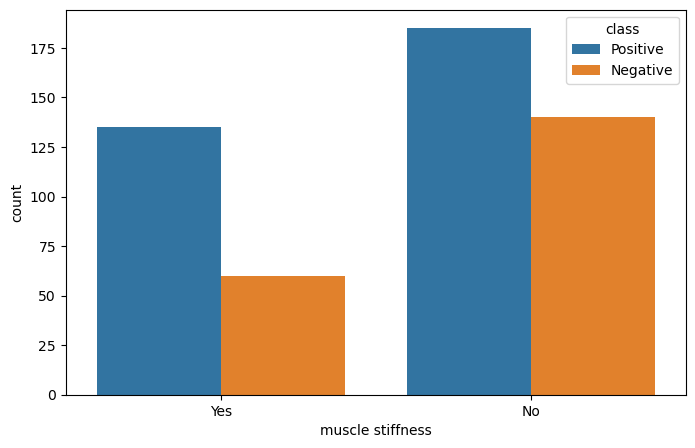

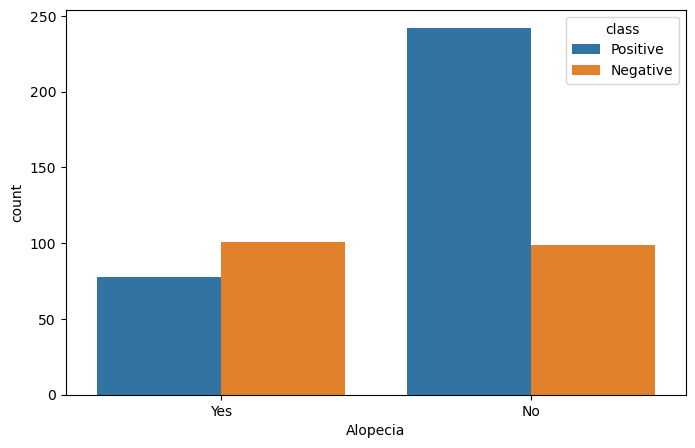

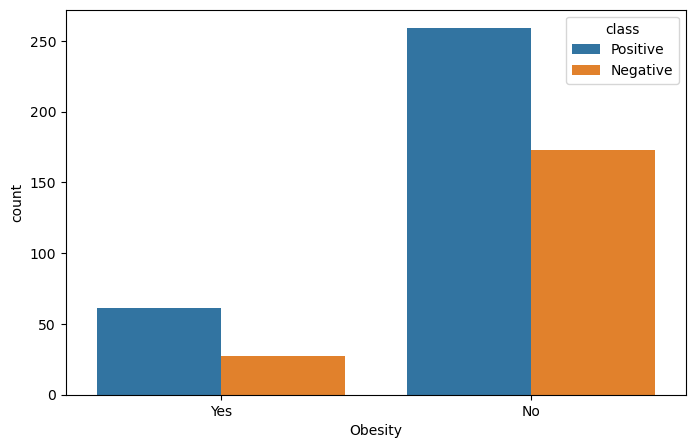

In [184]:
for column in diabetes_data.columns[:-1]:  # Exclude the target variable
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='class', data=diabetes_data)
    plt.show()


In [185]:
##csv_file_path = 'diabetes.csv'
##diabetes_data = pd.read_csv(csv_file_path)


In [186]:
print(diabetes_data.columns)


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


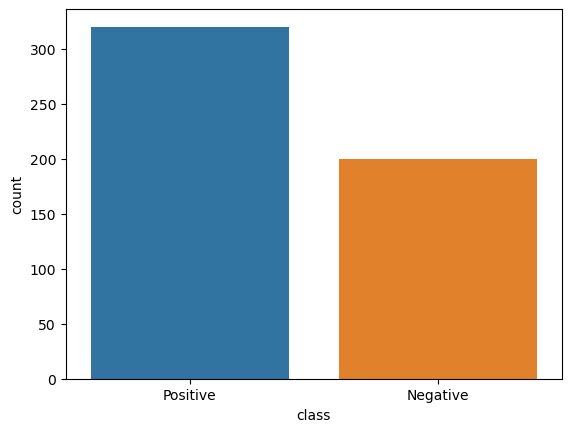

C:\Users\Global Village\AppData\Local\Temp\ipykernel_52484\3064909028.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = diabetes_data.corr()['class'].sort_values(ascending=False)


KeyError: 'class'

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target Variable Distribution
sns.countplot(x='class', data=diabetes_data)
plt.show()

# Correlation with Target
correlation_with_target = diabetes_data.corr()['class'].sort_values(ascending=False)
print(correlation_with_target)


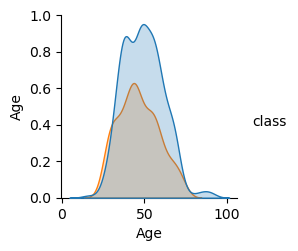

In [188]:
sns.pairplot(diabetes_data, hue='class')
plt.show()


In [189]:
# Check data types
print("Data Types:")
print(diabetes_data.dtypes)


Data Types:
Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


In [190]:
from sklearn.preprocessing import LabelEncoder

# Convert 'class' variable to numerical values (0 and 1)
label_encoder = LabelEncoder()
diabetes_data['class'] = label_encoder.fit_transform(diabetes_data['class'])


In [191]:
# Remove leading and trailing whitespaces from column names
diabetes_data.columns = diabetes_data.columns.str.strip()

# Convert binary categorical variables to numerical values
binary_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
diabetes_data[binary_columns] = diabetes_data[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


In [192]:
# Convert 'Gender' variable to one-hot encoding
diabetes_data = pd.get_dummies(diabetes_data, columns=['Gender'])


In [193]:
# Check updated data types
print("Updated Data Types:")
print(diabetes_data.dtypes)


Updated Data Types:
Age                   int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int32
Gender_Female         uint8
Gender_Male           uint8
dtype: object


In [194]:
# Check class distribution
print("Class Distribution:")
print(diabetes_data['class'].value_counts())

Class Distribution:
1    320
0    200
Name: class, dtype: int64


In [195]:
# Separate features and target variable
X = diabetes_data.drop('class', axis=1)
y = diabetes_data['class']

In [196]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [197]:
correlation_matrix = diabetes_data.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
X_filtered_correlation = X.drop(columns=highly_correlated_features)


C:\Users\Global Village\AppData\Local\Temp\ipykernel_52484\323420224.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [198]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)  # Choose the number of features you want to keep
X_rfe = rfe.fit_transform(X, y)


C:\Users\Global Village\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Global Village\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


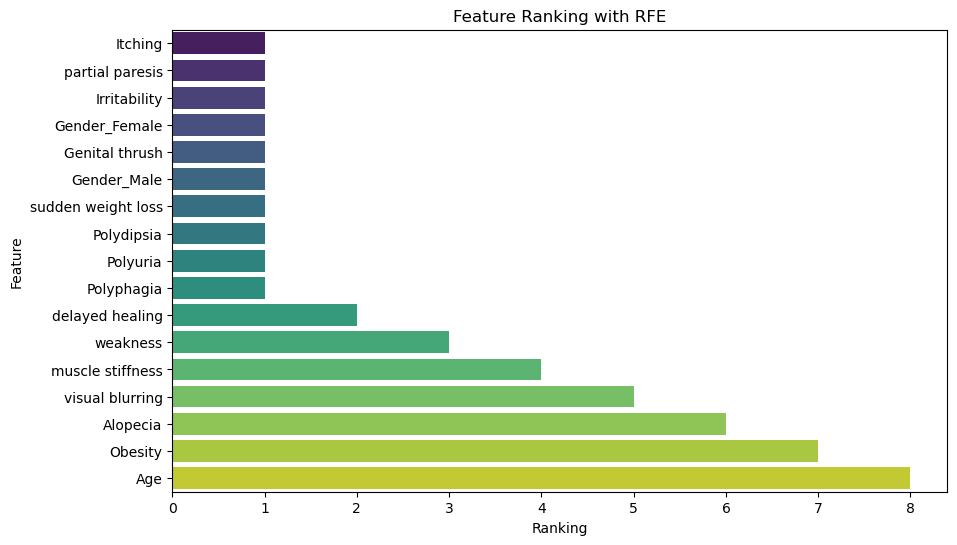

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the RFE model
rfe.fit(X, y)

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Create a DataFrame with feature names and their rankings
feature_ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking_df, palette='viridis')
plt.title('Feature Ranking with RFE')
plt.show()


In [203]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

k_best = SelectKBest(score_func=mutual_info_classif, k=10)  # Choose the number of features you want to keep
X_kbest = k_best.fit_transform(X, y)


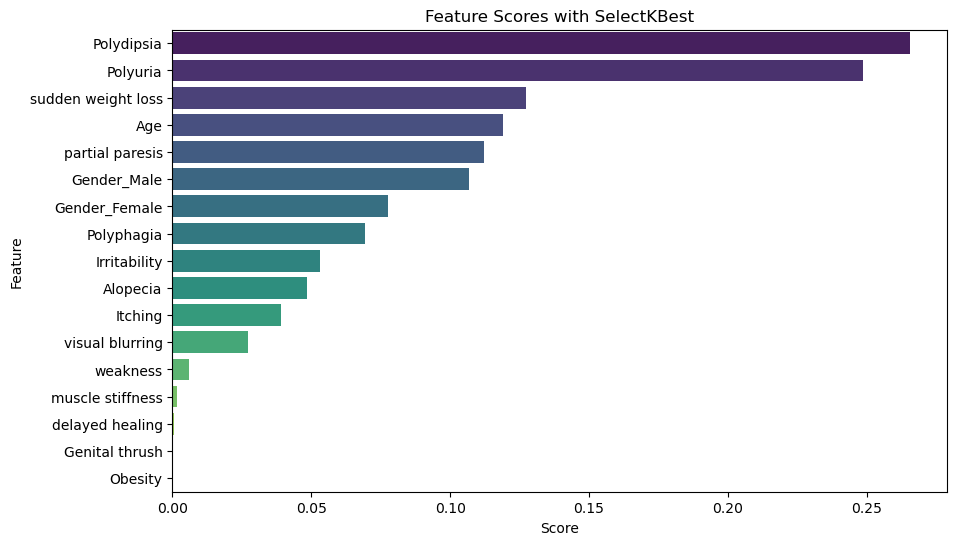

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the SelectKBest model
k_best.fit(X, y)

# Get the scores of each feature
feature_scores = k_best.scores_

# Create a DataFrame with feature names and their scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Sort the DataFrame by score
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores_df, palette='viridis')
plt.title('Feature Scores with SelectKBest')
plt.show()


In [205]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X, y)
feature_importances = model_rf.feature_importances_
threshold = 0.01  # Choose a threshold
important_features = X.columns[feature_importances > threshold]
X_tree_importance = X[important_features]


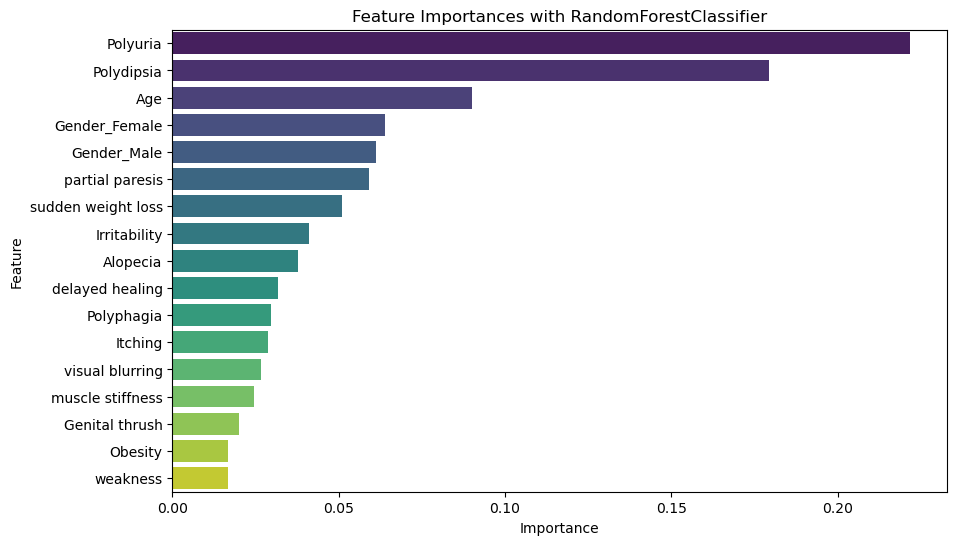

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the RandomForestClassifier model
model_rf.fit(X, y)

# Get the feature importances
feature_importances = model_rf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances with RandomForestClassifier')
plt.show()
